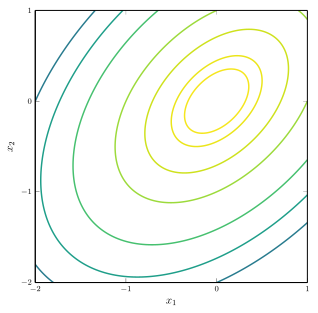

In [51]:
using Plots, LaTeXStrings, Printf, LinearAlgebra, Dates
pgfplotsx() #pyplot()

fx(x1,x2) =  x1^2 - 0.9*x1*x2 + x2^2

x1 = -2:0.01:1
x2 = -2:0.01:1

pl1 = contour(x1, x2, fx, framestyle = :box, levels=[0.1,0.2,0.5,1,2,3,4], 
    c = cgrad(:viridis, rev = true), ylab = L"x_2", xlab = L"x_1",
    xlims = (-2,1), ylims = (-2,1), legend = false, grid = false,
    contour_labels = false, bins = 150, label = false, size=(450,450), lw= 1.5)

In [52]:
function bracket_minimum(f, x=0; s=1e-2, k=2.0)
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    end

    while true
        c, yc = b + s, f(b + s)
        if yc > yb
            return a < c ? (a, c) : (c, a)
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k
    end
end

using Base.MathConstants
function fibonacci_search(f, a, b, n; ϵ=0.002)
    s = (1-√5)/(1+√5)
    ρ = 1 / (φ*(1-s^(n+1))/(1-s^n))
    d = ρ*b + (1-ρ)*a
    yd = f(d)
    for i in 1 : n-1
        if i == n-1
            c = ϵ*a + (1-ϵ)*d
        else
            c = ρ*a + (1-ρ)*b
        end
        yc = f(c)
        if yc < yd
            b, d, yd = d, c, yc
        else
            a, b = b, c
        end
        ρ = 1 / (φ*(1-s^(n-i+1))/(1-s^(n-i)))
    end
    return a < b ? (a, b) : (b, a)
end

function line_search(f, x, d)
    objective = α -> f(x + α*d)
    a, b = bracket_minimum(objective)
    α = fibonacci_search(objective, a, b, 100)
    return x + (sum(α)/2)*d, sum(α)/2
end

line_search (generic function with 1 method)

In [53]:
basis(i, n) = [k == i ? 1.0 : 0.0 for k in 1 : n]

function powell(f, x, ϵ)
    n = length(x)
    U = [basis(i,n) for i in 1 : n]
    Δ = Inf

    while Δ > ϵ
        x′ = x
        for i in 1 : n
            d = U[i]
            x′, α = line_search(f, x′, d)
            push!(points, (x′))
        end

        for i in 1 : n-1
            U[i] = U[i+1]
        end
        U[n] = d = x′ - x
        x′, α = line_search(f, x′, d)
        push!(points, (x′))
        Δ = norm(x′ - x)
        x = x′
    end
    return x
end

powell (generic function with 1 method)

In [54]:
f = x -> x[1]^2 - 0.9*x[1]*x[2] + x[2]^2
x0 = [-1.5, -1.5]

points = []
push!(points, (x0))

x_opt = powell(f, x0, 0.0001)

2-element Array{Float64,1}:
 -1.1664660256334898e-24
  4.053142374298718e-25

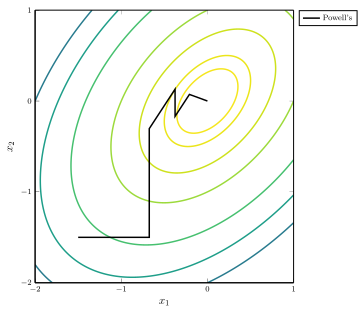

In [55]:
plot!([P[1] for P in points], [P[2] for P in points], label = "Powell's", legend = true, lw = 1.5, lc = :black)

display(pl1)

In [56]:
savefig(pl1, "7.2 Powell's Method.svg")

In [57]:
points

10-element Array{Any,1}:
 [-1.5, -1.5]
 [-0.6750000067905042, -1.5]
 [-0.6750000067905042, -0.30374999993748064]
 [-0.3755215683492118, 0.13049373939931103]
 [-0.3755215683492118, -0.16898470536160365]
 [-0.20891325400754002, 0.07259735243488735]
 [-2.710413005146961e-10, -3.930194919510299e-10]
 [5.342397001917623e-15, -1.856473633213021e-15]
 [5.145984750707754e-21, 7.46395700305471e-21]
 [-1.1664660256334898e-24, 4.053142374298718e-25]

In [58]:
(length(points)-1)*120/60

18.0